<h1 style="text-align: center; color:red">Zabavna analiza izračunljivih funkcija</h1>

## Sadržaj:

1. [Kratak uvod u izračunljivost](#uvod)  
    1.1. [Slavni ljudi](#ljudi)
2. [Inicijalne funkcije](#ini)  
    2.1. [Nula](#nula)  
    2.2. [Sljedbenik](#succ)  
    2.3. [Projekcije](#proj)  
3. [Funkcije višeg reda](#ho)  
    3.1. [Kompozicija](#cmp)  
    3.2. [Primitivna rekurzija](#pr)  
    3.3. [Minimizacija](#min)  
4. [Parsiranje i generiranje](#pgen)  
    4.1. [Parsiranje kodova](#pk)  
    4.2. [Nasumične funkcije](#nf)  
    4.3. [Iscrpne kombinacije](#ik)
5. [Primjeri](#exa)  
    5.1. [Logički operatori](#lo)  
    5.2. [Aritmetički operatori](#arit)  
    5.3. [Složenije](#slo)   

**Sljedeće linije obavezno pokrenuti da bismo unutar bilježnice dobro generirali matplotlib prikaze i animacije.**

In [119]:
# to show figures in notebook
%matplotlib nbagg
# to load animations.py script
%load_ext autoreload
#%reload_ext autoreload
%aimport my_animations

<a id='uvod'></a>
## 1. Kratak uvod u izračunljivost

Posve neformalno, ali dovoljno precizno; kažemo da je funkcija izračunljiva ako je možemo kreirati pomoću inicijalnih funkcija.  
Inicijalne funkcije su **nula**, **sljedbenik** i **projekcije**, a alati za kreiranja koje imamo na raspolaganju su **kompozicija**, **primitivna rekurzija** i **minimizacija**.  


Sve inicijalne funkcija, kompoziciju, primitivnu rekurziju i minimizaciju napisat ćemo kao objekte sličnih svojstava, te ćemo dodatno definirati i funkcije višeg reda `compose`, `prim_recurse` i `minimize` kojima ćemo lako kreirati nove funkcije.

---
Dodatno o izračunljivosti može se pročitati na sljedećim linkovima:

- [Izračunljivost (predavanja Vedrana Čačića)](https://1c9dd60f-a-62cb3a1a-s-sites.googlegroups.com/site/mathnastava/home/izracunljivost/noveverzije/izracunljivost-slajdovi%20%282%29.pdf?attachauth=ANoY7cqlHThvKM0VITfk_RFIHFNbql5UoDI2XX7a9ynzl01dg5bF9Fe0eN7swDQ2d65vwYlMZ78kSeFiNAN2IeXU084GG8iwDsIEbBWvsTNMf4n3HaXIiYV4A5g-w9jvEpyeHWO2qkLV6NR2RRmVHyX29h1OvfbxhM2ppLmuFXZ7VRPV1Qt90puSbmTVaT16wC3SAKJC60-h71j-PMDMzHMIWIKFXGMk3cK3pSkJ3Waz5rg7GuifQPzyep6tixFjPnYogGp77dQuo44aMFsXmq7EQ26KoAgPsAxe1r3AwJeCPqUqpZZcq-Q%3D&attredirects=0)
- [Izračunljivost u $\lambda$-računu](https://github.com/sandrolovnicki/tex_works/blob/master/Computability%20in%20%CE%BB-calculus/Izra%C4%8Dunljivost%20u%20%CE%BB-ra%C4%8Dunu%20(croatian).pdf)

<a id='ljudi'></a>
### 1.1. Slavni ljudi

Sljedeći kod je **vrlo neobavezan** i zahtijeva instalaciju OpenCV (CV - Computer Vision) biblioteke koja nije trivijalna i traje značajno dugo.  

Sukladno s time, kod će pokušati import OpenCV-a u kom slučaju će na sliku primijeniti naučene parametre za prepoznavanje lica te nacrtati zelene pravokutnike oko uočenih lica.  
Ako pak nemate OpenCV, zajednička slika Churcha i Turinga koja se nalazi u repozitoriju bit će prikazana s crnim "rezom" između slika Churcha i Turinga.

<IPython.core.display.Javascript object>


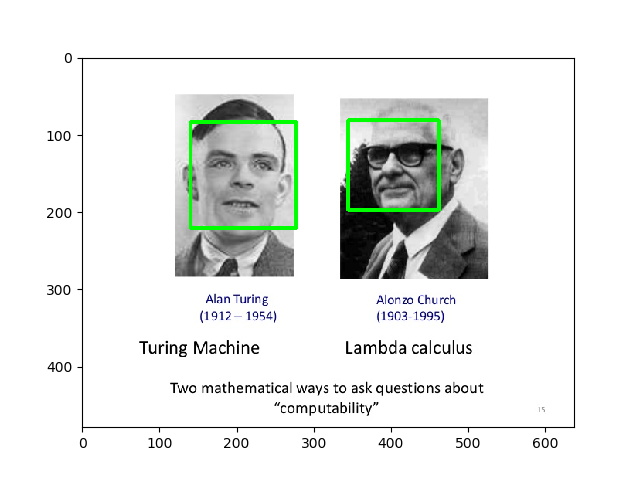

In [120]:
try:
    import cv2
    import matplotlib.pyplot as plt

    def convertToRGB(img): 
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # load test iamge
    img = cv2.imread('church_turing.jpg')
    # convert the test image to gray image as opencv face detector expects gray images 
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # load cascade classifier training file for haarcascade 
    haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

    # detect faces
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:     
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)

    #convert image to RGB and show image 
    plt.imshow(convertToRGB(img))
    plt.show()
    
except ImportError:
    import matplotlib.pyplot as plt
    import numpy as np

    img = plt.imread('church_turing.jpg', format='jpg')
    ish = img.shape
    line = np.zeros((ish[0],10,ish[2]))
    divi = np.hsplit(img,2)
    res = np.concatenate((divi[0],line,divi[1]),axis=1)

    plt.imshow(res)
    plt.show()

<a id='ini'></a>
## Inicijalne funkcije

<a id='nula'></a>
### 2.1. Nula

Nulu je funkcija koju označujemo sa $Z$ i definiramo
$$Z : \mathbb{N}^k \rightarrow \mathbb{N}$$
$$Z(\overrightarrow{x}) = 0$$

Definiramo sad i klasu koja će predstavljati spomenutu funkciju $Z$. Primijetimo da je ova klasa *callable* te se u tom slučaju ponaša upravo kao funkcija $Z$.

In [121]:
class zero(object):
    code = 0
    def __call__(self,*args):
        return 0
    def __str__(self):
        return 'Z'
    def __eq__(self, other):
        return self.code == other.code
    def show_deeper(self):
        return 'Z'
    def show_deepest(self):
        return 'Z'
    
# test
Z = zero()
print(Z(), Z(3), Z(3,2,5))
print(Z)

0 0 0
Z


Kako $Z$ djeluje i kako ju je korisno (kao i sve ostale funkcije koje ćemo spominjati) zamišljati, ilustrirano je sljedećom animacijom.  

**NAPOMENA:** Sve animacije koje ćemo koristiti napisane su u *my_animations.py* skripti zbog bolje preglednosti bilježnice.

<IPython.core.display.Javascript object>


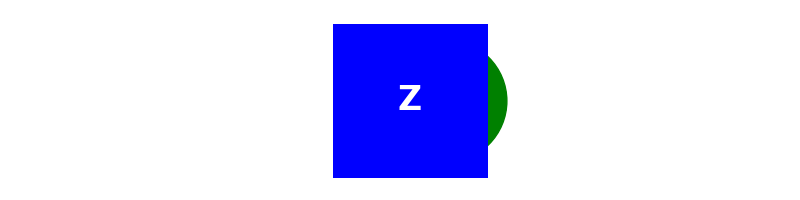

In [122]:
my_animations.anim_initial('Z',lambda x:0,3)

<a id='succ'></a>
### 2.2. Sljedbenik
Funkciju sljedbenika označujemo sa $S$ i **inače** definiramo:
$$S : \mathbb{N} \rightarrow \mathbb{N}$$
$$S(x) = x+1$$
Da bismo izbjegli neželjene greške vezane uz broj argumenata (a želimo kod zadržati koliko-toliko jednostavnim) kad ćemo kreirati sve moguće kombinacije od $1,2,3,...$ inicijalne funkcije, definirat ćemo funkciju sljedbenika kao: 
$$S : \mathbb{N}^k \rightarrow \mathbb{N}$$ 
$$S(\overrightarrow{x}) = x_1+1$$

In [123]:
class successor(object):
    code = 1
    #def: accept even multiple aguments, but work with first
    def __call__(self,*args):
        if len(args) == 0:
            return 0
        return args[0]+1
    def __str__(self):
        return 'S'
    def __eq__(self, other):
        return self.code == other.code
    def show_deeper(self):
        return 'S'
    def show_deepest(self):
        return 'S'
    
# test
S = successor()
print(S(), S(2), S(2,3,5))
print(S)

0 3 3
S


Pogledajmo sad i animaciju.

<IPython.core.display.Javascript object>


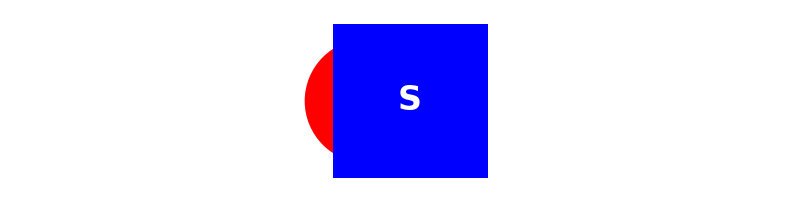

In [124]:
my_animations.anim_initial('S',lambda x:x+1,17)

<a id='proj'></a>
### 2.3. Projekcije 
Projekciju označujemo s $I$ te definiramo
$$I : \mathbb{N}^{k+1} \rightarrow \mathbb{N}$$ 
$$I(n,\overrightarrow{x}) = x_n, 1 \leq n \leq k$$
Opet, da bismo izbjegli neželjene greške tijekom generiranja svih kombinacija, definirat ćemo projekciju s
$$I : \mathbb{N}^{k+1} \rightarrow \mathbb{N}$$ 
$$I(n,\overrightarrow{x}) = \begin{cases} 
      x_n & 1 \leq n \leq k \\
      x_k & n > k 
   \end{cases}
$$


In [125]:
class projection(object):
    code = [2]
    def __init__(self,n=1):
        self.n = n
        self.code = [2,n]
    def __call__(self,*args):
        if len(args) == 0:
            return 0
        # def: return last argument if n is out of args bounds
        if len(args) < self.n:
            return args[-1]
        return args[self.n-1]
    def __str__(self):
        return 'I'+str(self.n)
    def __eq__(self, other):
        return self.code == other.code
    def show_deeper(self):
        return 'I'+str(self.n)
    def show_deepest(self):
        return 'I'+str(self.n)

# test
I2 = projection(2)
print(I2(1,2,3,4))
print(I2.code)
print(I2) 

2
[2, 2]
I2


Slijedi i animacija.

<IPython.core.display.Javascript object>


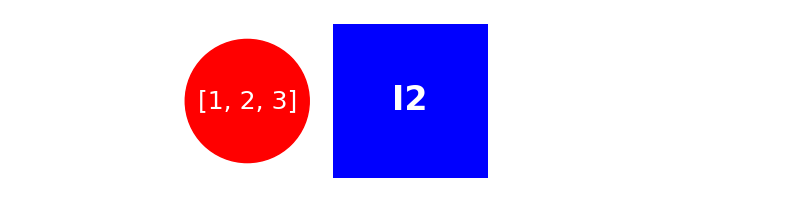

In [126]:
my_animations.anim_initial('I2',lambda *args:args[1],[1,2,3])

<a id='ho'></a>
## 3. Funkcije višeg reda

U ovoj točki govorimo o funkcijama višeg reda, tj. onima koje će graditi kompliciranije funkcije od građevnih jedinica koje su inicijalne funkcije. Imamo 3 tipa kompliciranijih funkcija: **kompozicija**, **primitivna rekurzija** i **minimizacija**. One će opet, kao i inicijalne funkcije, biti reprezentirane *callable* klasama.

Generiranje gorespomenutih 3 funkcija omogućit će nam funkcije višeg reda `compose`, `prim_recurse` i `minimize` čiji argumenti su klase koje predstavljaju izračunljive funkcije 

<a id='cmp'></a>
### 3.1. Kompozicija

Kompoziciju izračunljivih funkcija $G^n, H_1,H_2,...,H_n$ označujemo s $G \circ (H_1,H_2,...,H_n)$ i definiramo
$$G \circ (H_1,H_2,...,H_n)(\overrightarrow{x}) := G(H_1(\overrightarrow{x}),H_2(\overrightarrow{x}),...,H_n(\overrightarrow{x}))$$

In [127]:
def compose(g, *hs):
    hs_num = len(hs)
    g_params = [None]*hs_num
    class composition(object):
        code = [3]
        def __init__(self):
            self.code.extend([g.code,*[h.code for h in hs]])
        def __call__(self,*args):
            for i in range(0,hs_num):
                g_params[i] = hs[i](*args)
            return g(*g_params)
        def __str__(self):
            try:
                return self.name
            except AttributeError:
                name = '('+str(g)+'¤'
                if(hs_num>1):
                    name += '('
                for i in range(0,hs_num-1):
                    name += str(hs[i])+','
                name += str(hs[-1])
                if(hs_num>1):
                    name += ')'
                return name+')'
        def __eq__(self, other):
            return self.code == other.code
        def set_name(self,name):
            self.name = name
        def show_deeper(self):
            name = '('+str(g)+'¤'
            if(hs_num>1):
                name += '('
            for i in range(0,hs_num-1):
                name += str(hs[i])+','
            name += str(hs[-1])
            if(hs_num>1):
                name += ')'
            return name+')'
        def show_deepest(self):
            name = '('+g.show_deepest()+'¤'
            if(hs_num>1):
                name += '('
            for i in range(0,hs_num-1):
                name += hs[i].show_deepest()+','
            name += hs[-1].show_deepest()
            if(hs_num>1):
                name += ')'
            return name+')'
    return composition()
    
# test
testf = compose(I2,S,compose(S,Z))
print(testf(511))
print(testf.code)
print(testf)
testf.set_name("testf")
print(testf)
print(testf.show_deepest())

1
[3, [2, 2], 1, [3, 1, 0]]
(I2¤(S,(S¤Z)))
testf
(I2¤(S,(S¤Z)))


Na sljedećoj animaciji možemo vidjeti kako djeluje tromjesna izračunljiva funkcija $g \circ (h_1,h_2,h_3)$ kad primi $x$.

<IPython.core.display.Javascript object>


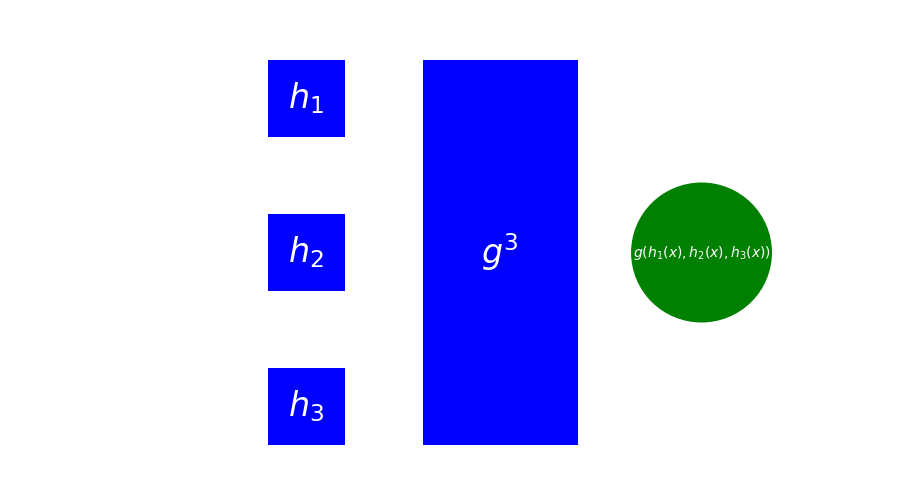

In [128]:
my_animations.anim_composition()

<a id='pr'></a>
### 3.2. Primitivna rekurzija

Primitivnu rekurziju izračunljivih funkcija $G$ i $H$ označujemo $G.PR.H$ i za $F = G.PR.H$ definiramo
$$F(\overrightarrow{x},0) := G(\overrightarrow{x})$$
$$F(\overrightarrow{x},y+1) := H(\overrightarrow{x},y,F(\overrightarrow{x},y))$$
Postoji i degenerirani oblik primitivne rekurzije koji definiramo
$$F(0) := G(0)$$
$$F(y+1) := H(y,F(y))$$

In [129]:
def prim_recurse(g, h):
    class prim_recursion(object):
        code = [4]
        def __init__(self):
            self.code.extend([g.code,h.code])
        def __call__(self,*args):
            # po definiciji
            if isinstance(args,int):
                # degenerate version
                if args == 0:
                    return g(0)
                return h(args-1,prim_recurse(g,h)(args-1))
            # non-degenerate
            if args[-1] == 0:
                return g(*args[:-1])
            return h(*args[:-1],args[-1]-1,prim_recurse(g,h)(*args[:-1],args[-1]-1))
        def __str__(self):
            try:
                return self.name
            except AttributeError:
                return '('+str(g)+".PR."+str(h)+')'
        def __eq__(self, other):
            return self.code == other.code
        def set_name(self,name):
            self.name = name
        def show_deeper(self):
            return '('+str(g)+".PR."+str(h)+')'
        def show_deepest(self):
            return '('+g.show_deepest()+".PR."+h.show_deepest()+')'
    return prim_recursion()

Već samo s primitivnom rekurzijom i inicijalnim funkcijama možemo stvarati moćne funkcije, što se vidim u sljedećim primjerima.

In [130]:
I1 = projection(1)
I3 = projection(3)

add = prim_recurse(I1,compose(S,I3))
print(add)
print("9+11="+str(add(9,11)))
add.set_name("add")

pdc = prim_recurse(Z,I1)
pdc.set_name("pdc")
sub = prim_recurse(I1,compose(pdc,I3))
print(sub)
print("5-2="+str(sub(5,2)))
sub.set_name("sub")

(I1.PR.(S¤I3))
9+11=20
(I1.PR.(pdc¤I3))
5-2=3


<a id='min'></a>
### 3.3. Minimizacija

Minimizaciju izračunljive funkcije $G$ označujemo s $min(G)$ i definiramo
$$min(G)(\overrightarrow{x}) := \mu y(G(\overrightarrow{x},y) \simeq 0)$$
Dakle, najmanji $y$ takav da vrijedi $G(\overrightarrow{x},y) = 0$. Takav ne mora uvijek postojati, stoga imamo oznaku $\simeq$.

In [131]:
def minimize(g):
    class minimization(object):
        code = [5]
        def __init__(self):
            self.code.append(g.code)
        def __call__(self,*args):
            y = 0
            # po definiciji
            while g(*args,y) != 0: 
                y += 1
                if y > 100:
                    return -1
            return y
        def __str__(self):
            try:
                return self.name
            except AttributeError:
                return "min("+str(g)+')'
        def __eq__(self, other):
            return self.code == other.code
        def set_name(self,name):
            self.name = name
        def show_deeper(self):
            return "min("+str(g)+')'
        def show_deepest(self):
            return "min("+g.show_deepest()+')'
        
    return minimization()

# test
simple = minimize(sub)
print(simple.code)
print(simple(3))

[5, [4, [2, 1], [3, [4, 0, [2, 1]], [2, 3]]]]
3


<a id='pgen'></a>
## 4. Parsiranje i generiranje

Pažljivi čitatelj mogao je primijetiti da sve klase koje predstavljaju funkcije o kojima smo govorili imaju svojstvo `code` koje jedinstveno određuje izračunljivu funkciju.  

U ovom poglavlju vidjet ćemo kako se možemo poigrati tim kodovima.

<a id='pk'></a>
### 4.1. Parsiranje kodova

U vodimo funkciju za parsiranje funkcije (objekta, ne imena) iz njenog koda.

In [132]:
# creating functions from code
def parse_from_code(code):
    if isinstance(code,int):
        if code == 0:
            return zero()
        if code == 1:
            return successor()
        #raise ValueError("In this code position only zero (code 0) and successor (code 1) are allowed.")
        return None
    argl = len(code)-1
    if code[0] == 2:
        if argl == 1 and isinstance(code[1],int):
            return projection(code[1])
        #raise ValueError("Projection (code 2) must be followed by 1 integer representing its projecting dimension but you provided " + str(argl))
        return None
    if code[0] == 3:
        if argl > 1:
            for i in range (1,argl+1):
                if parse_from_code(code[i]) is None:
                    return None
            return compose(parse_from_code(code[1]),*[parse_from_code(hc) for hc in code[2:]])
        #raise ValueError("Composition (code 3) is defined with at least 2 functions (arguments) but you provided just " + str(argl))
        return None
    if code[0] == 4:
        if argl == 2 and parse_from_code(code[1]) is not None and parse_from_code(code[2]) is not None:
            return prim_recurse(parse_from_code(code[1]), parse_from_code(code[2]))
        #raise ValueError("Primitive recursion (code 4) is defined with exactly 2 functions (arguments) but you provided " + str(argl))
        return None
    if(code[0] == 5):
        if argl == 1 and parse_from_code(code[1]) is not None:
            return minimize(parse_from_code(code[1]))
        #raise ValueError("Minimization (code 5) is defined with exaclty 1 function (argument) but you provided " + str(argl))    
        return None
    else:
        #raise ValueError("Higher order function codes are: 3,4,5 but you provided " + str(code[0]))
        return None

In [135]:
ss = parse_from_code(1)
print(ss(3))

print(parse_from_code([1,0,1,1,1]))

print(add.code)
print(parse_from_code(add.code))

4
None
[4, [2, 1], [3, 1, [2, 3]]]
(I1.PR.(S¤I3))


<a id='nf'></a>
### 4.2. Nasumične funkcije

Kreirajmo sad nekoliko nasumičnih lista koji su barem prikladnog oblika da budu kodovi naših funkcija. Vidjet ćemo, očekivano, kako su kodovi rijetki u svijetu svih mogućih lista

In [136]:
import random as rnd

def random_code(depth,maxlen):
    eltype = rnd.randint(0,1)
    if eltype==0 and depth!=0:
        return rnd.randint(1,5)
    else:
        depth+=1
        if depth>=3:
            return rnd.randint(1,5)
        else:
            lilen = rnd.randint(2,maxlen)
            retlist = []
            for i in range(0,lilen):
                retlist.append(random_code(depth,maxlen))
            return retlist    

In [137]:
import pandas as pd

cdlist = []
fnlist = []
cdnum = 10000
for i in range(0,cdnum):
    code = random_code(0,3)
    cdlist.append(str(code))
    fnlist.append(parse_from_code(code))

dframe = pd.DataFrame({"codes": cdlist, "functions": fnlist})
dframe.columns = ["code", "function"]
#dframe

Pogledajmo sad koliko od ovih $10000$ lista predstavlja valjan kod izračunljive funkcije.

In [138]:
nonNone_frame = dframe[dframe.function.notnull()]
print("Broj kodova koji se nisu parsirali u None: ", nonNone_frame.shape[0], "od", cdnum)
nonNone_frame

Broj kodova koji se nisu parsirali u None:  364 od 10000


,code,function
9,"[2, 2]",I2
25,"[5, [2, 4]]",min(I4)
30,"[5, [2, 5]]",min(I5)
87,"[2, 1]",I1
128,"[5, [2, 3]]",min(I3)
202,"[5, [2, 2]]",min(I2)
212,"[5, 1]",min(S)
213,"[2, 3]",I3
243,"[2, 2]",I2
440,"[2, 2]",I2


<a id='ik'></a>
### 4.3. Iscrpne kombinacije

Kreiramo sad iscrpnim algoritmom sve moguće izračunljive funkcije koje se sastoje od danog broja pod-funkcija `n`. Uvodimo i dodatan parametar broja argumenata `argnum` koji nam ustvari kaže koje ćemo sve projekcije koristiti tijekom generiranja. Argument `funs` je lista funkcija koje imamo na raspolaganju (izuzevši projekcije) za kreiranje novih.

In [139]:
def all_combinations(funs,n,argnum):
    # add appropriate projections
    for i in range (1,argnum+2):
        funs.append(projection(i))
    # start algorithm
    if n==1:
        return [f for f in funs]
    functions = []
    lowers = all_combinations(funs,n-1,argnum)
    for lf in lowers:
        
        functions.append(minimize(lf))
        
        for f in funs:
            
            c12 = compose(f,lf)
            if c12 not in functions:
                functions.append(c12)
            if lf is not f:
                c21 = compose(lf,f)
                if c21 not in functions:
                    functions.append(c21)
            
            p12 = prim_recurse(f,lf)
            if p12 not in functions:
                functions.append(p12)
            if lf is not f:
                p21 = prim_recurse(lf,f)
                if p21 not in functions:
                    functions.append(p21)
                    
    return functions
    

Prvo generirajmo kombinacije samo s inicijalnim funkcijama te pokušajmo među tim kombinacijama naći funkciju koja se ponaša kao dvomjesna funkcija zbrajanja.

In [140]:
import pandas as pd

inits = [zero(),successor()]
fns = all_combinations(inits,3,2)
print("Broj kombinacija:", len(fns))

cands = []
values = []
for f in fns:
    if f(2,3) == 5:
        cands.append(f)
        values.append("17+23=" + str(f(17,23)))
        
dframe = pd.DataFrame({"candidates": cands, "values": values})
dframe.columns = ["kandidat","izračunata vrijednost"]
dframe

Broj kombinacija: 1161


,kandidat,izračunata vrijednost
0,(S¤(S¤S)),17+23=20
1,((S¤S)¤S),17+23=20
2,((S¤S)¤I2),17+23=25
3,((S¤S)¤I3),17+23=25
4,(S¤(S¤I2)),17+23=25
5,(S¤(S¤I3)),17+23=25
6,(I1.PR.(S¤I3)),17+23=40
7,(I2.PR.(S¤I3)),17+23=40
8,(I3.PR.(S¤I3)),17+23=40


Vidimo da smo za uvjet `f(2,3)==5` dobili sveukupno 9 kandidata koji to dobro računaju, ali funkcije zbrajanja su samo $6, 7,$ i $8$ (koje su opet ustvari ista funkcija jer se po našoj definiciji $I_2$ i $I_3$ ponašaju isto kao $I_1$ kad dobiju samo jedan argument).  

Također, jasno je zašto smo dobili ostalih 6 kandidata. Kao argumente smo stavili brojeve $2,3$ koji su dovoljno blizu rezultatu koji želimo dobiti (broju $5$) da je do njega (ustvari i lakše) doći sukcesivnom primjenom sljedbenika na neki od argumenata.  

Nadalje, jasno, količina izračunljivih funkcija raste eksponencijalno s brojem svojih članica (podfunkcija). To možemo vidjeti na sljedećem grafu za $n = 1,2,3$.

<IPython.core.display.Javascript object>


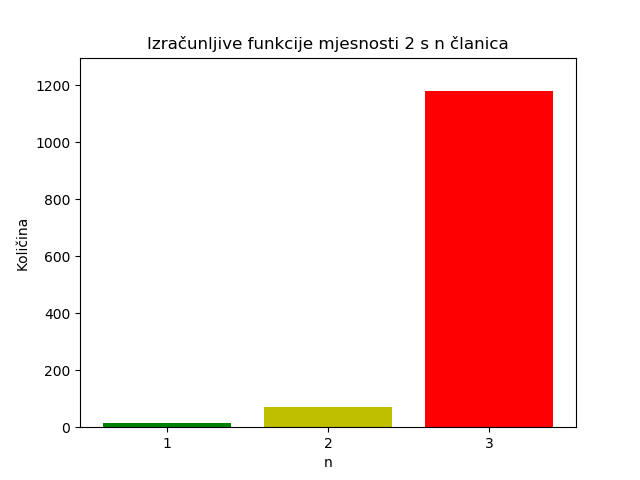

Text(0.5,1,'Izračunljive funkcije mjesnosti 2 s n članica')

In [141]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ind = np.arange(1, 4)
fsc = [len(all_combinations(inits,i,2)) for i in ind]

b1, b2, b3 = plt.bar(ind, fsc)
b1.set_facecolor('g')
b2.set_facecolor('y')
b3.set_facecolor('r')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_ylim([0, 1.1*fsc[-1]])
ax.set_xlabel('n')
ax.set_ylabel('Količina')
ax.set_title('Izračunljive funkcije mjesnosti 2 s n članica')

<a id='exa'></a>
## 5. Primjeri

U ovom završnom poglavlju dat ćemo nekoliko konkretnih primjera izračunljivih funkcija kreiranih pomoću alata stvorenih u ovoj bilježnici.

<a id='lo'></a>
### 5.1. Logički operatori

Definirajmo logičke "konstante" **T** i **F**, istina i laž. Htjeli bismo da i one budu budu neke izračunljive funkcije pa nam se odmah prirodno nameće da stavimo $F := Z$. Nadalje, mogli bismo po uzoru na funkciju $Z$ staviti da $T$ bude funkcija koja uvijek vraća $1$. To ćemo lako postići s $T := S \circ Z$.  

In [142]:
S = successor()
Z = zero()
F = Z
T = compose(S,Z)

Sad možemo definirati poznate logičke operatore `not`, `and`, `or`, `xor`.  
Iako ovi primjeri nisu dovoljno dobri ako želimo biti formalni, to nam nije niti cilj ovdje. Prirodne brojeve $0$ i $1$ ćemo smatrati da su također imena za $F$ i $T$, respektivno.

In [143]:
nott = prim_recurse(T,F)

<a id='arit'></a>
### 5.2. Aritmetički operatori

Već smo jednom kreirali funkcije zbrajanja i oduzimanja. Definirajmo sad osim njih i još neke te testirajmo njihovom djelovanje.

In [144]:
I1 = projection(1)
I2 = projection(2)
I3 = projection(3)

add = prim_recurse(I1,compose(S,I3))
print("9+11="+str(add(9,11)))
add.set_name("add")

pdc = prim_recurse(Z,I1)
print(pdc(99))
pdc.set_name("pdc")

sub = prim_recurse(I1,compose(pdc,I3))
print("15-8="+str(sub(15,8)))
sub.set_name("sub")

mul = prim_recurse(Z,compose(add,I1,I3))
print("3*5="+str(mul(3,5)))
mul.set_name("mul")
print(mul.show_deeper())

poww = prim_recurse(compose(S,Z),compose(mul,I1,I3))
print("2^5="+str(poww(2,5)))
poww.set_name("pow")
print(poww.show_deepest())

9+11=20
98
15-8=7
3*5=15
(Z.PR.(add¤(I1,I3)))
2^5=32
((S¤Z).PR.((Z.PR.((I1.PR.(S¤I3))¤(I1,I3)))¤(I1,I3)))


<a id='slo'></a>
### 5.3. Složenije

Sad kreirajmo neke složenije funkcije: računanje faktorijela.

In [146]:
fact = prim_recurse(compose(S,Z),compose(mul,compose(S,I1),I2))
print("3!="+str(fact(3)))
print(fact)
fact.set_name("fact")

3!=6
((S¤Z).PR.(mul¤((S¤I1),I2)))
